In [ ]:
### 时间序列--美国GDP

In [1]:
import warnings
warnings.filterwarnings("ignore") # 忽略警告
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
data=pd.read_excel('data/美国GDP.xls')

In [3]:
data.head()

,Year,Quarter,DPI,GDP,PCE,CP,DIVIDEND
0,1947,1,1096.0,1570.519,1017.2,21.2,6.0
1,1947,2,1072.8,1568.653,1034.0,20.0,6.3
2,1947,3,1102.8,1567.966,1037.5,19.8,6.5
3,1947,4,1089.7,1590.938,1037.7,21.7,6.4
4,1948,1,1107.3,1616.069,1042.6,22.9,7.0


In [4]:
#取对数
data['LGDP']=data.GDP.map(np.log)

In [7]:
y=data['LGDP']

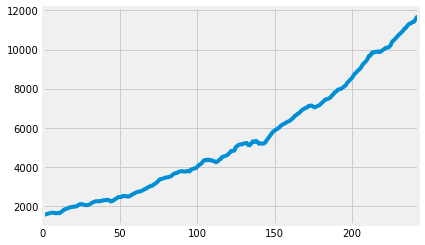

In [5]:
data['GDP'].plot()

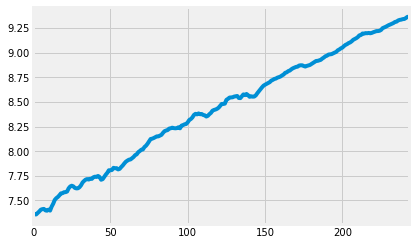

In [8]:
y.plot()

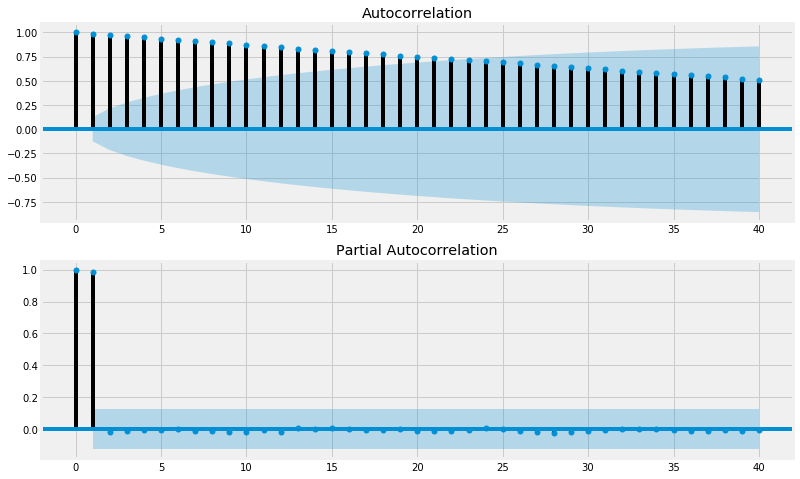

In [8]:
fig = plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)#两列一行第一个
fig = sm.graphics.tsa.plot_acf(y,lags=40,ax=ax1)#lags=40,表示总共列出40阶。自相关图
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(y,lags=40,ax=ax2)#偏自相关图

In [9]:
#取一阶差分，并去除首项空值
y=y.diff(1)[1:]

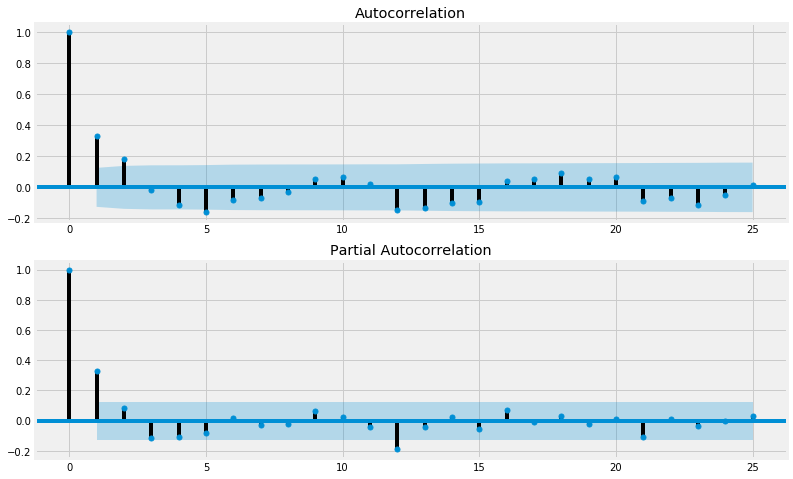

In [10]:
fig = plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)#两列一行第一个
fig = sm.graphics.tsa.plot_acf(y,lags=25,ax=ax1)#lags=40,表示总共列出40阶。
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(y,lags=25,ax=ax2)

In [11]:
mod = sm.tsa.statespace.SARIMAX(y.values,trend='c',order=(0, 1, 2))
results = mod.fit()

/Applications/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [12]:
print(results.summary())

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                  243
Model:               SARIMAX(0, 1, 2)   Log Likelihood                 785.034
Date:                Thu, 11 Jan 2018   AIC                          -1562.069
Time:                        13:35:27   BIC                          -1548.097
Sample:                             0   HQIC                         -1556.441
                                - 243                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -1.475e-05   1.54e-05     -0.959      0.338   -4.49e-05    1.54e-05
ma.L1         -0.7094      0.470     -1.508      0.131      -1.631       0.212
ma.L2         -0.2917      0.133     -2.200      0.0

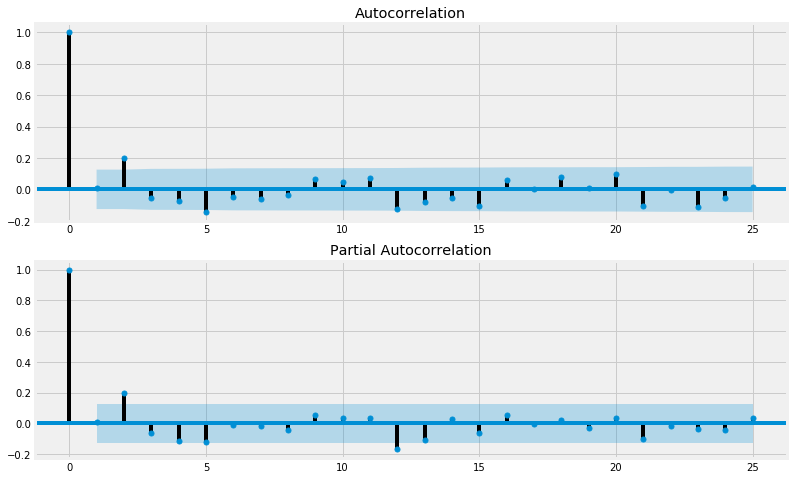

In [13]:
fig = plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)#两列一行第一个
fig = sm.graphics.tsa.plot_acf(results.resid,lags=25,ax=ax1)#lags=40,表示总共列出40阶。
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(results.resid,lags=25,ax=ax2)

In [14]:
results.resid

array([ -1.18884866e-03,   7.65546682e-04,   1.52395074e-02,
         7.62429663e-03,   8.66980845e-03,  -5.51580006e-03,
        -4.31886459e-03,  -2.12292138e-02,  -1.52046216e-03,
         7.74221947e-03,  -1.70336397e-02,   4.19190390e-02,
         1.09800323e-02,   2.73209188e-02,   3.26049995e-05,
         1.42624082e-03,   5.76855853e-03,   7.07330428e-03,
        -1.18196894e-02,   2.82640917e-03,  -1.10364897e-02,
        -7.35645861e-04,   2.23039027e-02,   1.00040373e-03,
        -4.18510589e-03,  -1.61227070e-02,  -2.18122266e-02,
        -8.20983562e-03,  -5.78763749e-03,   3.87295342e-03,
         9.62981624e-03,   1.63876077e-02,   1.71727899e-03,
         2.78349718e-03,  -5.48953057e-03,  -1.29696066e-02,
         2.19157795e-03,  -1.12647512e-02,   1.03571987e-02,
        -6.25976056e-03,  -9.83729852e-03,   3.68844536e-03,
        -2.06129031e-02,  -2.99422159e-02,   7.01051749e-03,
         1.32573638e-02,   1.10293769e-02,   7.55354805e-03,
         1.53888735e-02,

In [39]:
0.00822+0.2918*0.00851-0.2024*0.00399+9.3653

9.375195642

In [15]:
pre = results.get_forecast(steps=1)

In [16]:
np.exp(pre.predicted_mean)

array([ 1.00462764])

In [17]:
results.resid

array([ -1.18884866e-03,   7.65546682e-04,   1.52395074e-02,
         7.62429663e-03,   8.66980845e-03,  -5.51580006e-03,
        -4.31886459e-03,  -2.12292138e-02,  -1.52046216e-03,
         7.74221947e-03,  -1.70336397e-02,   4.19190390e-02,
         1.09800323e-02,   2.73209188e-02,   3.26049995e-05,
         1.42624082e-03,   5.76855853e-03,   7.07330428e-03,
        -1.18196894e-02,   2.82640917e-03,  -1.10364897e-02,
        -7.35645861e-04,   2.23039027e-02,   1.00040373e-03,
        -4.18510589e-03,  -1.61227070e-02,  -2.18122266e-02,
        -8.20983562e-03,  -5.78763749e-03,   3.87295342e-03,
         9.62981624e-03,   1.63876077e-02,   1.71727899e-03,
         2.78349718e-03,  -5.48953057e-03,  -1.29696066e-02,
         2.19157795e-03,  -1.12647512e-02,   1.03571987e-02,
        -6.25976056e-03,  -9.83729852e-03,   3.68844536e-03,
        -2.06129031e-02,  -2.99422159e-02,   7.01051749e-03,
         1.32573638e-02,   1.10293769e-02,   7.55354805e-03,
         1.53888735e-02,

In [18]:
np.exp(9.365266+pre.predicted_mean)-11779

array([-49.25778441])

In [19]:
data

,Year,Quarter,DPI,GDP,PCE,CP,DIVIDEND,LGDP
0,1947,1,1096.0,1570.519,1017.2,21.2,6.0,7.359161
1,1947,2,1072.8,1568.653,1034.0,20.0,6.3,7.357973
2,1947,3,1102.8,1567.966,1037.5,19.8,6.5,7.357535
3,1947,4,1089.7,1590.938,1037.7,21.7,6.4,7.372079
4,1948,1,1107.3,1616.069,1042.6,22.9,7.0,7.387752
5,1948,2,1145.3,1644.637,1054.3,24.1,6.7,7.405275
6,1948,3,1168.4,1654.061,1056.1,23.8,7.1,7.410989
7,1948,4,1171.9,1657.988,1064.8,23.0,7.4,7.413360
8,1949,1,1147.6,1633.249,1066.1,21.0,7.2,7.398327
9,1949,2,1151.4,1628.439,1082.6,18.6,7.2,7.395377
